# Simulating spin-boson system with input parameters

We will handle the Holstein model in this example. Its Hamiltonian has the form as:
\begin{align}
    \hat{\boldsymbol{\rm H}} = \hat{\boldsymbol{\rm H}}_{e}+\hat{\boldsymbol{\rm H}}_{vib}+\hat{\boldsymbol{\rm H}}_{e-vib}
\end{align}
where $\hat{\boldsymbol{\rm H}}_{e}$ is the electronic term, $\hat{\boldsymbol{\rm H}}_{vib}$ is the vibrational term, and $\hat{\boldsymbol{\rm H}}_{e-vib}$ is the interaction term. These three terms have the form as:

\begin{align}
\hat{\boldsymbol{\rm H}}_{e}&=\sum_{m}\Delta\left(|m\rangle\langle m+1|+|m+1\rangle\langle m|\right)\\
\hat{\boldsymbol{\rm H}}_{vib}&=\sum_{m}\sum_{j}\frac{1}{2}\left(\frac{p_{mj}^{2}}{m_{j}}+m_{mj}\omega_{mj}^{2}x_{mj}^{2}\right)\\
\hat{\boldsymbol{\rm H}}_{e-vib}&=\sum_{m}\left(\sum_{j}c_{mj}x_{mj}\right)|m\rangle\langle m|
\end{align}

Where $\Delta$ is the coupling between nearest neighbors, $\omega_{mj}$ is the frequency of the $j$-th bath mode on $m$-th site, $x_{mj}$, $p_{mj}$ and $m_{mj}$ are coordinate, momentum and mass of this mode. $c_{mj}$ represents the coupling strength between the $m$-th site and its $j$-th mode. This coupling depend on the properties of the environment, and it can be described by spectral density $J_{m}(\omega)$:

\begin{align}
J_{m}(\omega)=\frac{\pi}{2}\sum_{mj}\frac{c_{mj}^{2}}{m_{mj}\omega_{mj}}\delta(\omega-\omega_{mj})
\end{align}

$J_{m}$ is assumed to be the same for all sites, and the spectral density we chose here is the Debye type:

\begin{align}
J(\omega)=\frac{\eta\omega\omega_{c}}{\omega_{c}^{2}+\omega^{2}}
\end{align}

In [2]:
import mpsqd
import numpy as np
import sys

## 1 Get parameters to construct MPO and MPS. 

```mpsqd.model.Holstein(nlevel,nbv,eta,omega,beta,delta,rho0,small=1e-14,nrmax=50,nrtt=1,need_trun=True)```

Construct MPO and MPS from parameters, the resulting MPO will be saved as ```self.pall```, and MPS will be ```self.rin```.

   **Parameters:**
   
   **nlevel: _int_**
    
   Number of terms for the correlation function of bath.
   
   **nbv: _int_**
    
   Number of states in every harmonic oscillator of bath to be considered.
   
   **eta: _float_**
   
   Parameter $\eta$ in the expression of Debye spectral density.
   
   **omega: _float_**
   
   Parameter $\omega_{c}$ in the expression of Debye spectral density.
   
   **beta: _float_**
   
   The parameter to indicate the temperature $T$: $\beta=\frac{1}{kT}$ , where $k$ is the Boltzmann constant.
   
   **delta: _float_**
   
   Parameter $\Delta$ in the expression of system Hamiltonian.
   
   **rho0: _ndarray_**
   
   Initial density matrix to be propagated, which should be a square matrix.
   
   **small: _float, optional_**
   
   The smallest singular value acceptable when MPO is being truncated.
   
   **nrmax: _int, optional_**
   
   The maximum value for the bound between tensors when MPO is being truncated. This maximum value will be unlimited when ```nrmax==0```.
   
   **nrtt: _int, optional_**
   
   The bound between tensors in the initial MPS.
   
   **need_trun: _{‘True’,‘False'}, optional_**
   
   Whether the MPO will be truncated during constructing.

In [3]:
rho0 = np.zeros((7,7),dtype=np.complex128)
rho0[0,0] = 1.0  #rho0 is a diagonal matrix in this example
hol = mpsqd.models.Holstein(10,5,0.5,1.0,1.0,1.0,rho0,nrtt=50)

after hsys, shape of rout [[  1   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
    2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
    2]
 [ 49 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
  100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
   49]
 [  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
    2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
    1]]
k0= (0.0007341652924567175+0j)
after k0, shape of rout [[  1   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
    9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
    9]
 [ 49 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
  100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
   49]
 [  9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
    9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9

## 2 Simulating with the control parameters.

```Holstein.prop(dt,nsteps,out_file_name="output.dat",prop_type="1tdvp",update_type="krylov",mmax=30,small=1e-13,nrmax=50,need_trun=True)```

  Propagating dynamics with ```self.rin``` and ```self.pall```.

  **Parameters:**
   
  **dt: _float_**
    
   The time step for simulation.
    
  **nsteps: _int_**
   
   The total number of steps for simulation.
    
  **out_file_name: _str, optional_**
   
   The name of output file, which is need to record the matrix element of reduced density matrix at every time step.
    
  **prop_type: _{‘1tdvp’,'2tdvp', ‘rk4'}, optional_**
   
   The method for simulation. '1tdvp' means one site time-dependent variational principle method, '2tdvp' means two site time-dependent variational principle method, 'rk4' means 4-th order Runge-Kutta method.

  **update_type: _{‘krylov’, ‘rk4'}, optional_**
   
   The method for updating nodes during the TDVP process. 'krylov' means Krylov space method, 'rk4' means 4-th order Runge-Kutta method. It is only used when ```prop_type=='1tdvp'```.
  
  **mmax: _int, optional_**
   
   The demension of the Krylov space for calculating matrix exponential. It is only used when ```prop_type=='1tdvp'``` or ```2tdvp```.

  **small: _float, optional_**
   
   The smallest singular value acceptable when MPS is being truncating (```prop_type=='rk4'```) or when the nodes of MPS are being spliting (```prop_type=='2tdvp'```). It is only used when ```prop_type=='rk4'``` or ```2tdvp```.
   
  **nrmax: _int, optional_**
   
   The maximum value for the bound between tensors when MPS is being truncating (```prop_type=='rk4'```) or when the nodes of MPS are being spliting (```prop_type=='2tdvp'```). This maximum value will be unlimited when ```nrmax==0```. It is only used when ```prop_type=='rk4'``` or ```2tdvp```.
    
  **need_trun: _{‘True’, ‘False'}, optional_**
   
   Whether the MPS will be truncate at every time step. It is only used when ```prop_type=='rk4'```.
    
   **Return:**
   
   **density_array: _ndarray_**
   
   The result of simulating, ```density_array[0,:]``` is the time grids, and ```density_array[1:,:]``` is the matrix elements at each time steps, where the first dimension is for order in the matrix and the second is for time step.

In [4]:
rout=hol.prop(0.001,101,mmax=8)

istep = 1
istep = 2
istep = 3
istep = 4
istep = 5
istep = 6
istep = 7
istep = 8
istep = 9
istep = 10
istep = 11
istep = 12
istep = 13
istep = 14
istep = 15
istep = 16
istep = 17
istep = 18
istep = 19
istep = 20
istep = 21
istep = 22
istep = 23
istep = 24
istep = 25
istep = 26
istep = 27
istep = 28
istep = 29
istep = 30
istep = 31
istep = 32
istep = 33
istep = 34
istep = 35
istep = 36
istep = 37
istep = 38
istep = 39
istep = 40
istep = 41
istep = 42
istep = 43
istep = 44
istep = 45
istep = 46
istep = 47
istep = 48
istep = 49
istep = 50
istep = 51
istep = 52
istep = 53
istep = 54
istep = 55
istep = 56
istep = 57
istep = 58
istep = 59
istep = 60
istep = 61
istep = 62
istep = 63
istep = 64
istep = 65
istep = 66
istep = 67
istep = 68
istep = 69
istep = 70
istep = 71
istep = 72
istep = 73
istep = 74
istep = 75
istep = 76
istep = 77
istep = 78
istep = 79
istep = 80
istep = 81
istep = 82
istep = 83
istep = 84
istep = 85
istep = 86
istep = 87
istep = 88
istep = 89
istep = 90
istep = 91
istep = 

## 3 Write MPO and MPS to flie.

```Holstein.write_mpo_file(pall_file)```

   Write ```self.pall``` to file.
 
  **Parameters:**

  **pall_file: _str_**
   
   The name of folder for output file, the output file will be named as ```pall_file```+"_mpo.npz" 
   
```Holstein.write_mps_file(pall_file)```

   Write ```self.rin``` to file.
 
  **Parameters:**

  **pall_file: _str_**
   
   The name of folder for output file, the output file will be named as ```pall_file```+"_mps.npz"

In [5]:
hol.write_mpo_file("holstein")
hol.write_mps_file("holstein")

pall written to file


Showing the result saved in ```rout``` graphically:

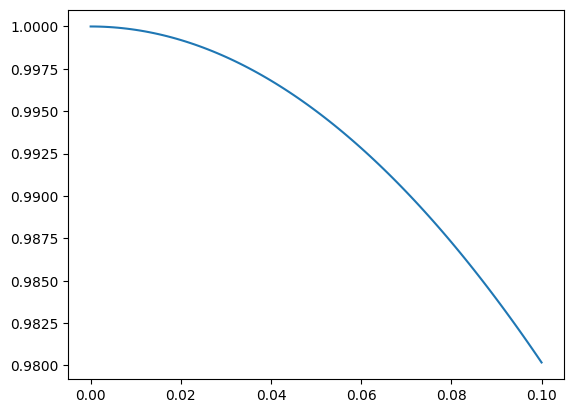

In [6]:
import matplotlib.pyplot as plt
plt.plot(rout[0,:].real,rout[1,:].real)
plt.show()